In [2]:
# To install basic/necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import joblib

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
#Loading the dataset
df = pd.read_csv('/content/PB_All_2000_2021.csv', sep=';')
df


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [33]:
df.shape

(2861, 11)

In [34]:
#Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [35]:
#Finding count of missing values
df.isnull().sum()

,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


In [36]:
#Changing the date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [38]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [39]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [40]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [41]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [43]:
#Setting the target pollutants
pollutants = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

**Week 2:**

In [44]:
#Imputing missing values
imputer = KNNImputer(n_neighbors=5)
df[pollutants] = imputer.fit_transform(df[pollutants])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [45]:
df.isnull().sum()

,0
id,0
date,0
NH4,0
BSK5,0
Suspended,0
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7840be0d0090>,
 'caps': [<matplotlib.lines.Line2D at 0x7840be0d1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840be0c7690>],
 'medians': [<matplotlib.lines.Line2D at 0x7840be0d2210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840be0d2c10>],
 'means': []}

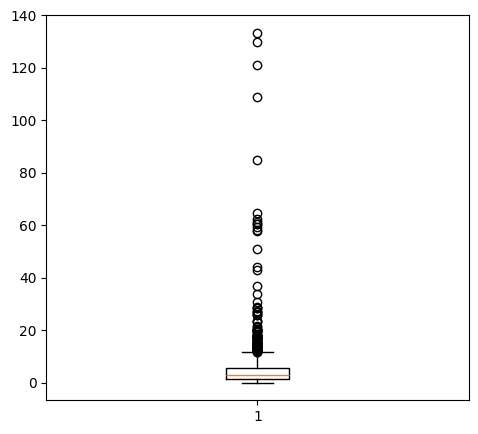

In [46]:
#Detecting outliers
import matplotlib.pyplot as plt
#Before cleaning
df_original=df.copy()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_original['NO3'])

In [47]:
#Compute IQR for NO3
Q1 = df['NO3'].quantile(0.25)
Q3 = df['NO3'].quantile(0.75)
IQR = Q3 - Q1

#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find and count outliers
outliers = df[(df['NO3'] < lower_bound) | (df['NO3'] > upper_bound)]
print(f"Outliers detected in NO3: {len(outliers)} rows")

#Remove outliers
df = df[(df['NO3'] >= lower_bound) & (df['NO3'] <= upper_bound)].reset_index(drop=True)
print(f"Data shape after NO3 outlier removal: {df.shape}")

Outliers detected in NO3: 114 rows
Data shape after NO3 outlier removal: (2747, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdf85850>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bdf795d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bdf84dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdf87f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdf94890>],
 'means': []}

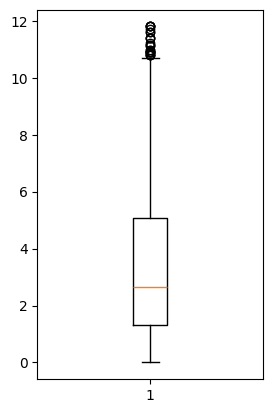

In [48]:
#After cleaning
plt.subplot(1, 2, 2)
plt.boxplot(df['NO3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdfd7c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bdff1650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bdfe7a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdff2b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdff3550>],
 'means': []}

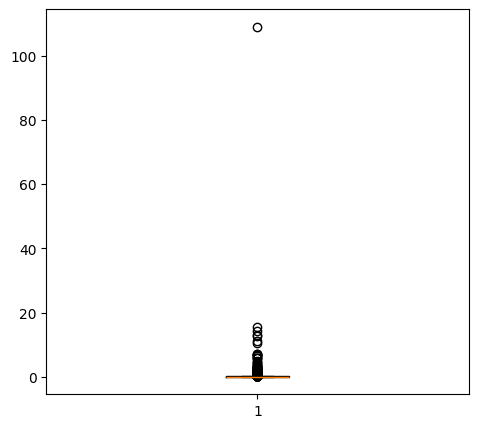

In [49]:
#Before cleaning NO2
df_original=df.copy()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_original['NO2'])

In [50]:
#Compute IQR for NO2
Q1 = df['NO2'].quantile(0.25)
Q3 = df['NO2'].quantile(0.75)
IQR = Q3 - Q1

#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find and count outliers
outliers = df[(df['NO2'] < lower_bound) | (df['NO2'] > upper_bound)]
print(f"Outliers detected in NO2:{len(outliers)} rows")

#Remove outliers
df = df[(df['NO2'] >= lower_bound) & (df['NO2'] <= upper_bound)].reset_index(drop=True)
print(f"Data shape after NO2 outlier removal:{df.shape}")

Outliers detected in NO2:340 rows
Data shape after NO2 outlier removal:(2407, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7840be432c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7840be4cbf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840be432310>],
 'medians': [<matplotlib.lines.Line2D at 0x7840be4c8ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840be4cb910>],
 'means': []}

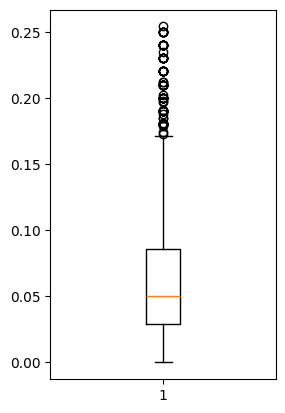

In [51]:
#After cleaning
plt.subplot(1, 2, 2)
plt.boxplot(df['NO2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7840be5e5790>,
 'caps': [<matplotlib.lines.Line2D at 0x7840be5e7c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840be5e47d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7840be5c69d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840be5c5790>],
 'means': []}

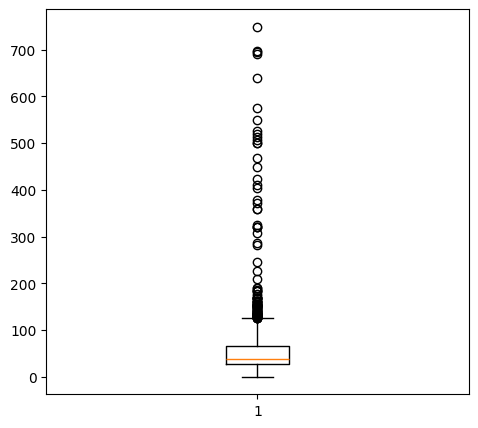

In [52]:
#Before cleaning SO4
df_original=df.copy()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_original['SO4'])

In [53]:
#Compute IQR for SO4
Q1 = df['SO4'].quantile(0.25)
Q3 = df['SO4'].quantile(0.75)
IQR = Q3 - Q1

#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find and count outliers
outliers = df[(df['SO4'] < lower_bound) | (df['SO4'] > upper_bound)]
print(f"Outliers detected in SO4: {len(outliers)} rows")

#Remove outliers
df = df[(df['SO4'] >= lower_bound) & (df['SO4'] <= upper_bound)].reset_index(drop=True)
print(f"Data shape after SO4 outlier removal:{df.shape}")

Outliers detected in SO4: 114 rows
Data shape after SO4 outlier removal:(2293, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7840bde55b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bde57090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bde55250>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bde60650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bde60f10>],
 'means': []}

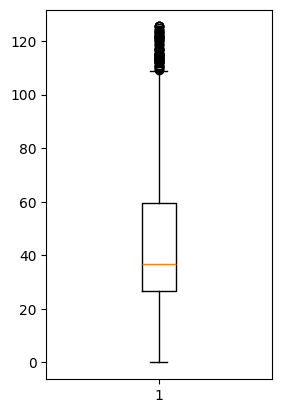

In [54]:
#After cleaning
plt.subplot(1, 2, 2)
plt.boxplot(df['SO4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdebdad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bdebf0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bdebcdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdec8a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdec9650>],
 'means': []}

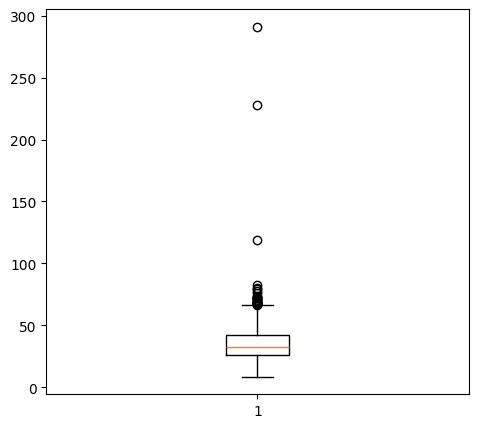

In [55]:
#Before cleaning CL
df_original=df.copy()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_original['CL'])

In [56]:
#Compute IQR for CL
Q1 = df['CL'].quantile(0.25)
Q3 = df['CL'].quantile(0.75)
IQR = Q3 - Q1

#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find and count outliers
outliers = df[(df['CL'] < lower_bound) | (df['CL'] > upper_bound)]
print(f"Outliers detected in CL: {len(outliers)} rows")

#Remove outliers
df = df[(df['CL'] >= lower_bound) & (df['CL'] <= upper_bound)].reset_index(drop=True)
print(f"Data shape after CL outlier removal:{df.shape}")

Outliers detected in CL: 28 rows
Data shape after CL outlier removal:(2265, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdd28bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bded8590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bdd28150>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdd2b010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdd2bb90>],
 'means': []}

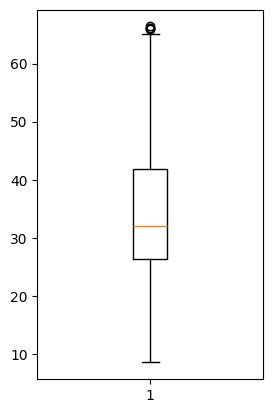

In [57]:
#After cleaning
plt.subplot(1, 2, 2)
plt.boxplot(df['CL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdd81350>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bdd82bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bdd80710>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdd88110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdd88d50>],
 'means': []}

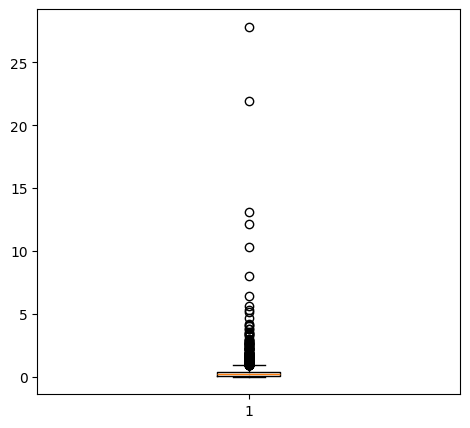

In [58]:
#Before cleaning NH4
df_original=df.copy()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_original['NH4'])

In [59]:
#Compute IQR for NH4
Q1 = df['NH4'].quantile(0.25)
Q3 = df['NH4'].quantile(0.75)
IQR = Q3 - Q1

#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find and count outliers
outliers = df[(df['NH4'] < lower_bound) | (df['NH4'] > upper_bound)]
print(f"Outliers detected in NH4: {len(outliers)} rows")

#Remove outliers
df = df[(df['NH4'] >= lower_bound) & (df['NH4'] <= upper_bound)].reset_index(drop=True)
print(f"Data shape after NH4 outlier removal:{df.shape}")

Outliers detected in NH4: 215 rows
Data shape after NH4 outlier removal:(2050, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdddb110>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bdde0650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bddda790>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdde1b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdda6290>],
 'means': []}

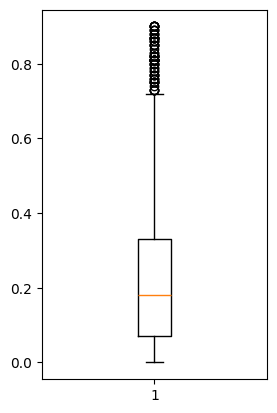

In [60]:
#After cleaning
plt.subplot(1, 2, 2)
plt.boxplot(df['NH4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdc3d150>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bdc3ea50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bdc3c550>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdc442d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdc44d90>],
 'means': []}

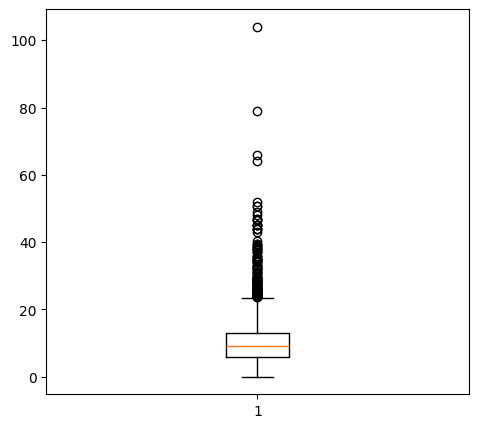

In [61]:
#Before cleaning Suspended
df_original=df.copy()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_original['Suspended'])

In [62]:
#Compute IQR for NH4
Q1 = df['Suspended'].quantile(0.25)
Q3 = df['Suspended'].quantile(0.75)
IQR = Q3 - Q1

#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find and count outliers
outliers = df[(df['Suspended'] < lower_bound) | (df['Suspended'] > upper_bound)]
print(f"Outliers detected in Suspended: {len(outliers)} rows")

#Remove outliers
df = df[(df['Suspended'] >= lower_bound) & (df['Suspended'] <= upper_bound)].reset_index(drop=True)
print(f"Data shape after Suspended outlier removal:{df.shape}")

Outliers detected in Suspended: 135 rows
Data shape after Suspended outlier removal:(1915, 13)


{'whiskers': [<matplotlib.lines.Line2D at 0x7840bdc8b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7840bdc9cb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7840bdc8ad10>],
 'medians': [<matplotlib.lines.Line2D at 0x7840bdc9e150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7840bdc9ecd0>],
 'means': []}

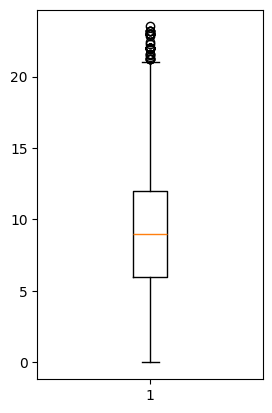

In [63]:
#After cleaning
plt.subplot(1, 2, 2)
plt.boxplot(df['Suspended'])

In [64]:
#Feature and target selection
X = df[["id", "year", "month"]]
y = df[pollutants]

In [65]:
# Encoding -- One‑hot encode station id
X_encoded = pd.get_dummies(X, columns=["id"], drop_first=True)

In [66]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [69]:
#Model Hyperparameter-Tuning & Training
rf = RandomForestRegressor(random_state=42, n_jobs=2)
model = MultiOutputRegressor(rf)

param_distributions = {
    "estimator__n_estimators": [100, 200],
    "estimator__max_depth": [10, 20],
    "estimator__min_samples_split": [2],
    "estimator__min_samples_leaf": [1],
    "estimator__max_features": ["sqrt"],
}
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=8,
    cv=3,
    verbose=2,
    scoring="r2",
    random_state=42,
    n_jobs=2,
)
search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best parameters:", search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'estimator__n_estimators': 200, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 10}


In [70]:
#Model Evaluation
y_pred = best_model.predict(X_test)
print("\nPerformance on held‑out test set:")
print("Pollutant     MSE        MAE       R2")
for i, p in enumerate(pollutants):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{p:<11s}  {mse:8.2f}  {mae:8.2f}  {r2:7.3f}")


Performance on held‑out test set:
Pollutant     MSE        MAE       R2
NH4              0.03      0.12    0.354
BSK5             3.71      1.48    0.356
Suspended       17.53      3.20    0.317
O2               6.83      2.00    0.374
NO3              3.41      1.39    0.465
NO2              0.00      0.03    0.235
SO4            258.95     11.37    0.659
PO4              0.05      0.15    0.295
CL              37.62      4.78    0.697


In [72]:
joblib.dump(best_model, "pollution_model.pkl")
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print("Model & column structure saved!")

Model & column structure saved!


In [75]:
station_id = '22'
year_input = 2024
month_input = None  #Set to a number or None to skip

input_dict = {'year': [year_input], 'id': [station_id]}
if month_input is not None:
    input_dict['month'] = [month_input]

input_data = pd.DataFrame(input_dict)
input_encoded = pd.get_dummies(input_data, columns=['id'], drop_first=True)

missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0

input_encoded = input_encoded[X_encoded.columns]

predicted_pollutants = best_model.predict(input_encoded)[0]

print(f"Predicted pollutant levels for station '{station_id}' in {year_input}"
      + (f", month {month_input}" if month_input is not None else "") + ":")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")

Predicted pollutant levels for station '22' in 2024:
  NH4: 0.22
  BSK5: 3.94
  Suspended: 7.40
  O2: 10.59
  NO3: 4.05
  NO2: 0.06
  SO4: 48.88
  PO4: 0.28
  CL: 41.10


In [76]:
#Defining Safe limit thresholds
safe_limits = {
    'NH4': lambda x: x < 0.5,
    'BSK5': lambda x: x < 3,
    'Suspended': lambda x: x < 25,
    'O2': lambda x: x > 5,
    'NO3': lambda x: x < 10,
    'NO2': lambda x: x < 0.1,
    'SO4': lambda x: x < 250,
    'PO4': lambda x: x < 0.1,
    'CL': lambda x: x < 250
}

In [80]:
#Water -- Safe or Polluted
overall_status = "Safe Water" if all(safe_limits[p](v) for p, v in zip(pollutants, predicted_pollutants)) else "Polluted Water"
print("Overall Water Status:", overall_status)

Overall Water Status: Polluted Water
